In [1]:
import cv2 #pip install opencv.python

In [2]:
import matplotlib.pyplot as plt #pip install matplotlib

In [3]:
config_file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='frozen_inference_graph.pb'

In [4]:
model=cv2.dnn_DetectionModel(frozen_model,config_file) #Loading the model


In [5]:
classLabels=[] #empty list of python
file_name='Labels.txt'
with open(file_name,'rt') as fpt:
    classLabels=fpt.read().rstrip('\n').split('\n')
    #classLabels.append(fpt.read())

In [6]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
print(len(classLabels))

80


In [8]:
#set up the configuration for the model
model.setInputSize(320,320)
model.setInputScale(1.0/127) #255/2=127.5
model.setInputMean((127.5,127.5,127.5)) #mobilenet=>[-1,1]
model.setInputSwapRB(True)

<dnn_Model 000001EB8E9EEC70>

# read an image


In [9]:
img=cv2.imread('Traffic.png')


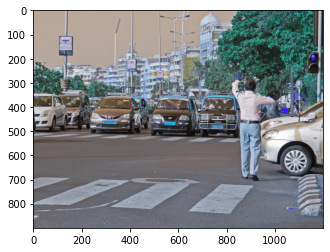

In [10]:
plt.imshow(img) #bgr

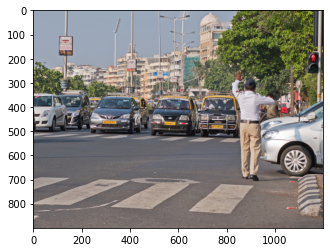

In [11]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [12]:
ClassIndex,confidence,bbox=model.detect(img,confThreshold=0.5)

In [13]:
print(ClassIndex)

[[10]
 [ 1]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 1]
 [ 3]
 [ 3]]


In [14]:
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    #cv2.rectangle(frame(x,y),(x+w,y+h),(255,0,0),2)
    #cv2.putText(img,text,(text_offset_x,text_offset_y),font,fontScale=font_scale,color(0,0,0),thickness=1)
        cv2.rectangle(img, boxes, color=(255,0,0),thickness=2)
        cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10,boxes[1]+40) , font, fontScale=font_scale, color=(0,255,0),thickness=2)

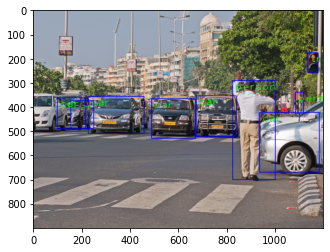

In [15]:

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

    VIDEO DEMO

In [ ]:
cap=cv2.VideoCapture("Cars.mp4")

#Check if the video is opened correctly
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot capture Video")
    
font_scale=2
font = cv2.FONT_HERSHEY_COMPLEX_SMALL 
while True:
    ret, frame = cap.read()
    
    ClassIndex, confidece, bbox = model.detect(frame, confThreshold=0.5)
    
    print(ClassIndex)
    if(len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame, boxes, color=(255,0,0), thickness=2)
                cv2.putText(frame, classLabels[ClassInd-1], (boxes[0]+10,boxes[0]+40) , font, fontScale=font_scale, color=(0,255,0), thickness=2)
    cv2.imshow('Object Detection', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

[[ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [10]
 [ 3]]
[[ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 1]
 [10]
 [ 3]
 [ 3]
 [ 3]
 [ 8]]
[[ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [10]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 8]]
[[ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 1]
 [ 3]
 [ 3]
 [10]]
[[ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 1]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [10]]
[[ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [10]
 [ 3]
 [ 3]]
[[ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [10]
 [ 3]]
[[ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [10]
 [ 3]
 [ 3]]
[[ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [10]]
[[ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [10]]
[[ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [10]
 [ 3]]
[[ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [10]
 [ 3]
 [ 3]]
[[ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [10]
 [ 3]]
[[ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [10]
 [ 3]]
[[ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [

[[3]
 [3]
 [3]
 [3]
 [8]
 [8]
 [8]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [8]
 [8]
 [8]]
[[3]
 [3]
 [3]
 [3]
 [3]
 [8]
 [8]
 [3]
 [8]]
[[3]
 [3]
 [3]
 [8]
 [3]
 [3]
 [8]
 [8]]
[[3]
 [3]
 [3]
 [3]
 [3]
 [8]
 [8]]
[[3]
 [3]
 [3]
 [3]
 [3]
 [8]
 [8]
 [8]]
[[3]
 [3]
 [3]
 [3]
 [8]
 [3]
 [8]]
[[3]
 [8]
 [3]
 [3]
 [3]
 [8]
 [8]
 [3]
 [6]]
[[3]
 [3]
 [3]
 [3]
 [8]
 [3]
 [3]
 [8]
 [8]]
[[3]
 [3]
 [3]
 [8]
 [3]
 [3]
 [8]
 [8]]
[[3]
 [3]
 [3]
 [8]
 [8]
 [3]
 [3]
 [8]]
[[3]
 [3]
 [3]
 [8]
 [8]
 [3]
 [8]
 [3]]
[[3]
 [3]
 [8]
 [3]
 [3]
 [3]
 [8]
 [8]]
[[3]
 [8]
 [3]
 [3]
 [3]
 [3]
 [8]
 [8]
 [6]]
[[3]
 [3]
 [3]
 [8]
 [3]
 [3]
 [1]]
[[3]
 [3]
 [3]
 [3]
 [3]
 [8]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [8]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [8]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [8]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [8]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]
 [8]
 [1]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]
 [8]
 [3]
 [1]
 [8]]
[[3]
 [3]
 [3]
 [8]
 [3]
 [3]
 [1]
 [8]]
[[3]
 [3]
 [3]
 [3]
 [8]
 [8]
 [1]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [8]
 

LIVE WEBCAM DEMO

In [ ]:
cap=cv2.VideoCapture(1)

#Check if the video is opened correctly
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open Webcam")
    
font_scale=2
font = cv2.FONT_HERSHEY_COMPLEX_SMALL 
while True:
    ret, frame = cap.read()
    
    ClassIndex, confidece, bbox = model.detect(frame, confThreshold=0.5)
    
    print(ClassIndex)
    if(len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame, boxes, color=(255,0,0), thickness=2)
                cv2.putText(frame, classLabels[ClassInd-1], (boxes[0]+10,boxes[0]+40) , font, fontScale=font_scale, color=(0,255,0), thickness=2)
    cv2.imshow('Object Detection', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()